In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import statsmodels.api as sm
from statsmodels.formula.api import ols, mixedlm
import numpy as np  
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
from statsmodels.tools.eval_measures import rmse 
from math import sqrt
from math import log1p
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables) 

{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [4]:
df = pd.concat([X,y], axis = 1)

In [5]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
X.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
dtypes: int64(23

In [8]:
X.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. -> continuous
X2: Gender (1 = male; 2 = female). -> binary
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). -> categorical (4)
X4: Marital status (1 = married; 2 = single; 3 = others). -> categorical (3)
X5: Age (year) -> continious (should be normal)


X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; X11 = the repayment status in April - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months 4 = four months ect -> 9 = nine months and above (categorical 10)


X12-X17: Amount of bill statement (NT dollar) (continous)

X12 = amount of bill statement in September, 2005;

X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005

X18-X23: Amount of previous payment (NT dollar). (continous)


X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.





In [9]:
def outlier_check(df_col):
    #create histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df_col)
    plt.title("Histogram")
    plt.show()

    #create boxploty = sn
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df_col)
    plt.title("Boxplot")
    plt.show()

    #summary statistics
    z =df_col.describe()

    return z


In [10]:
continous_col = ['X1','X5', 'X12', 'X13', 'X14','X15','X16','X17','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

bin_col = ['X2']

cat_col = ['X3','X4','X6','X7','X8','X9','X10','X11']

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


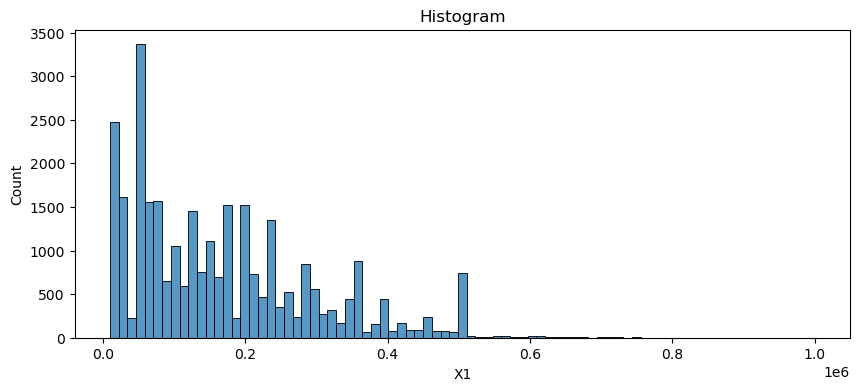

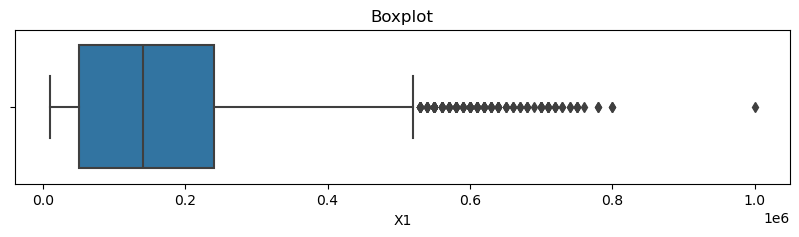

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


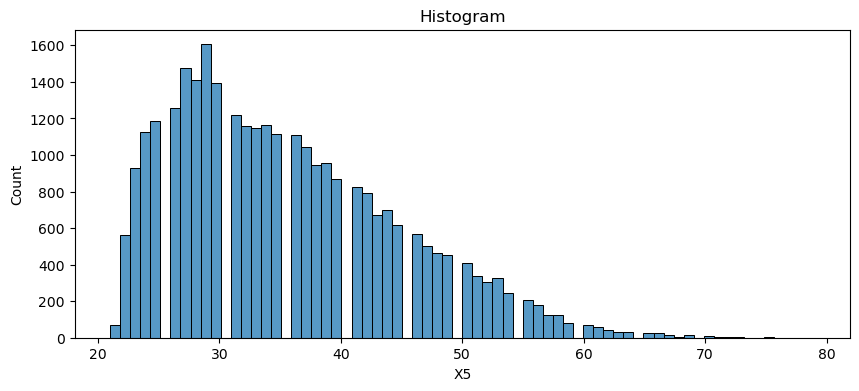

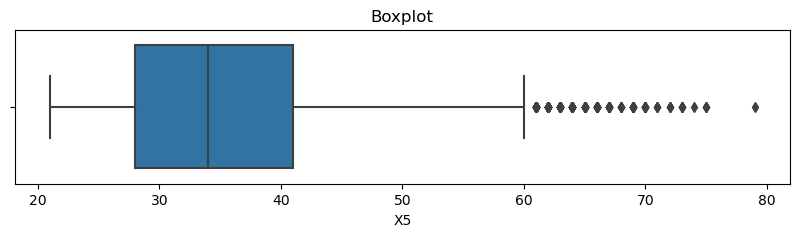

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


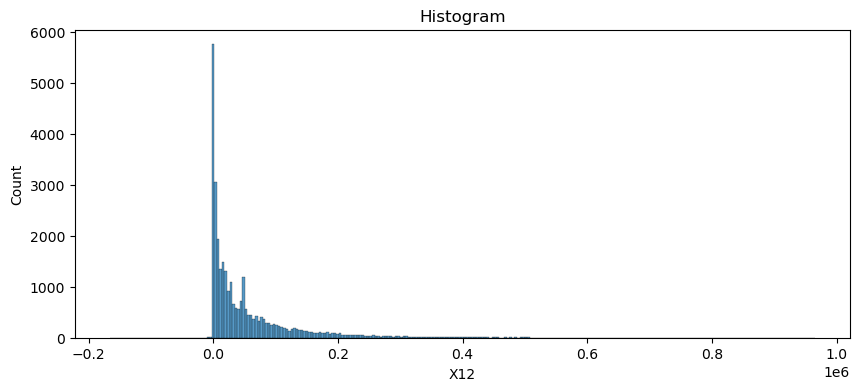

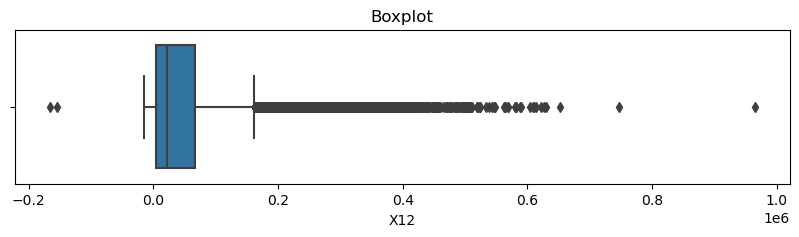

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


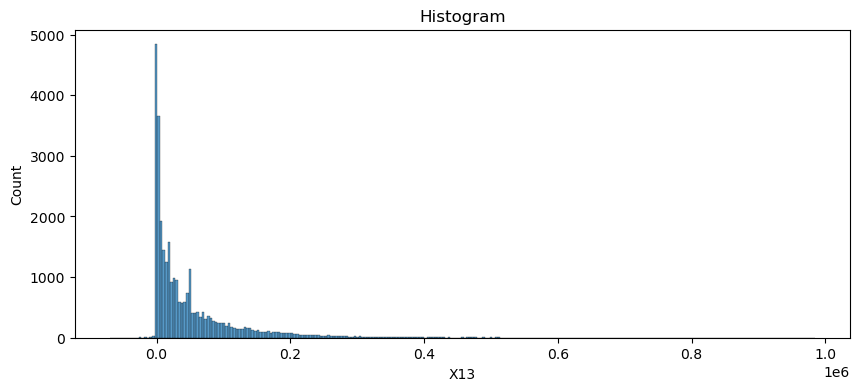

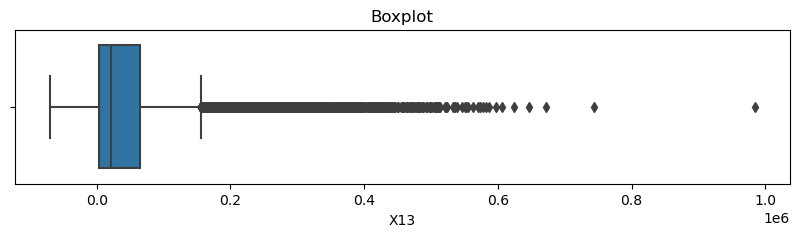

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


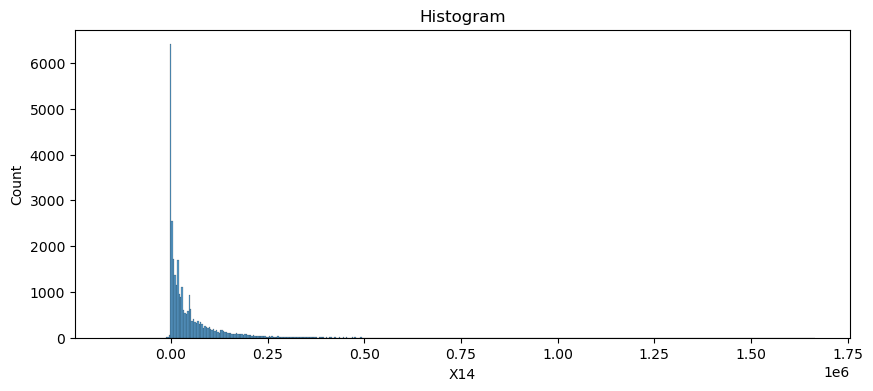

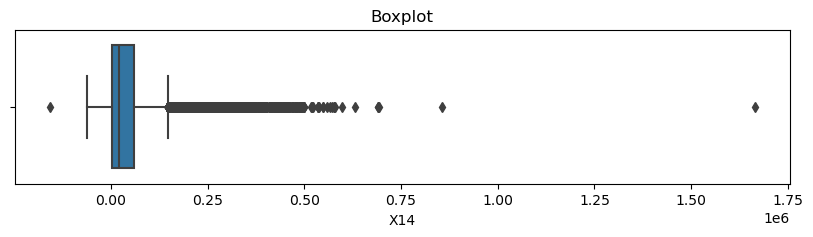

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


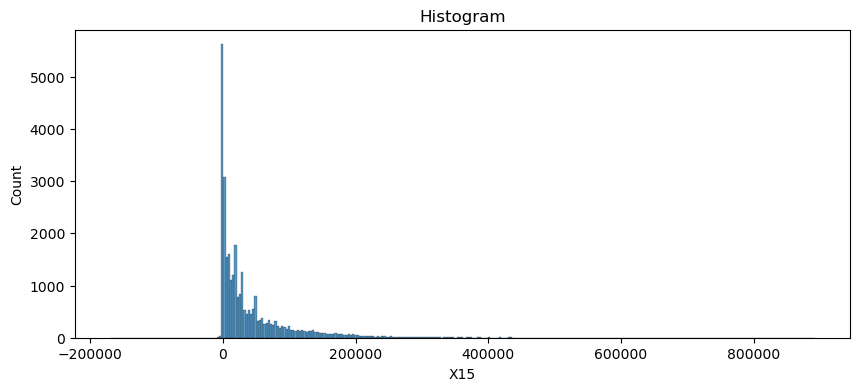

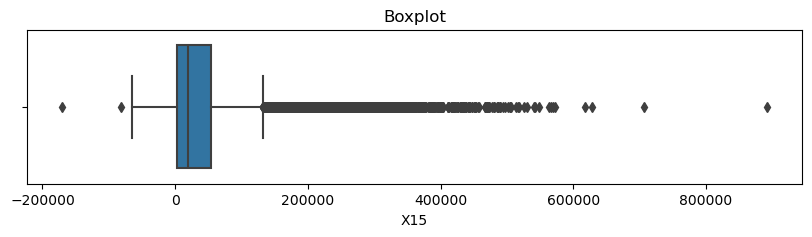

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


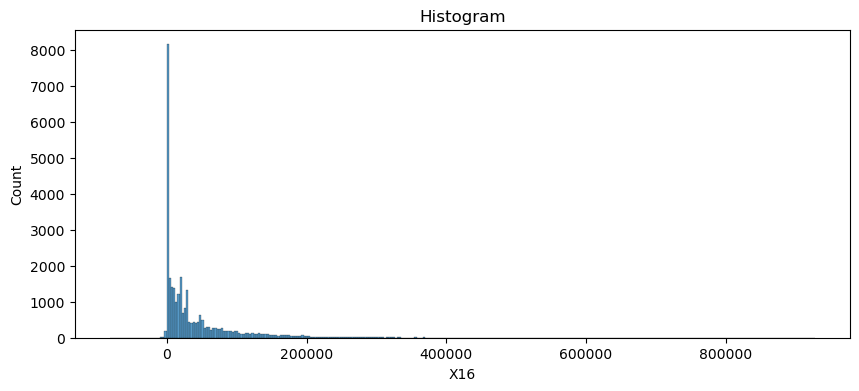

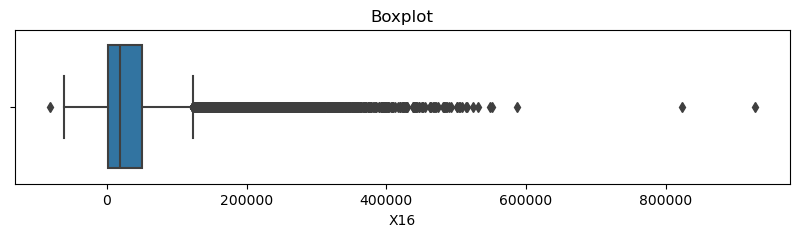

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


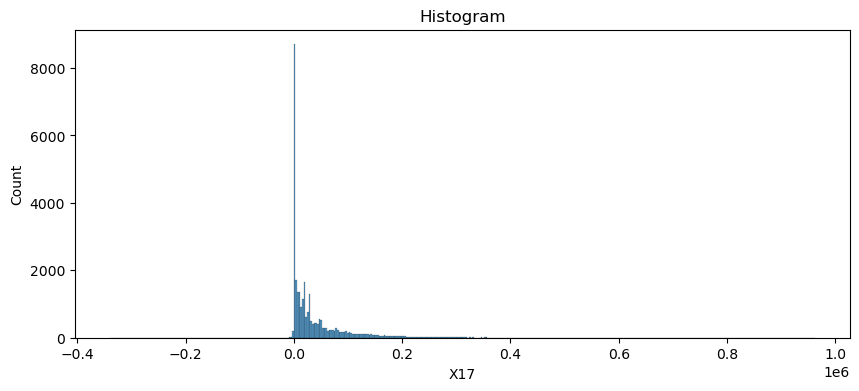

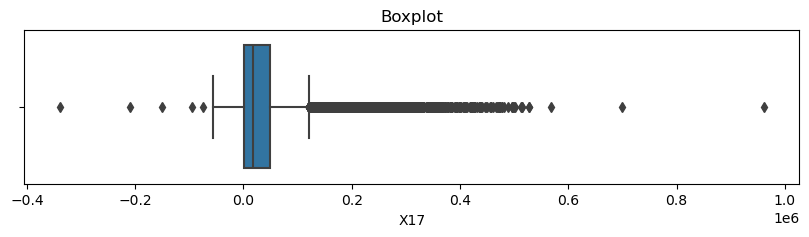

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


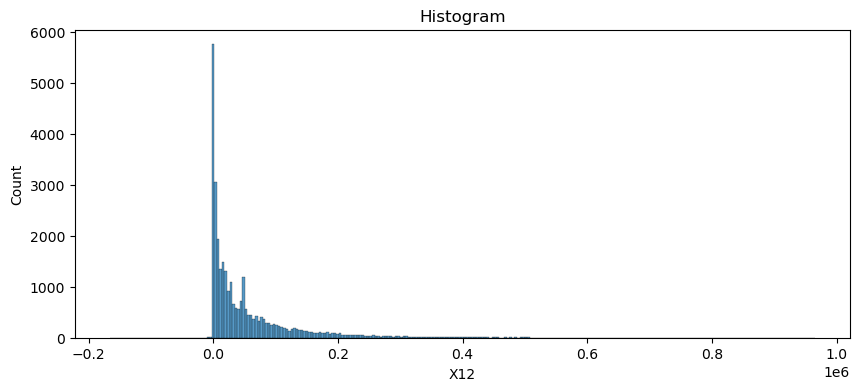

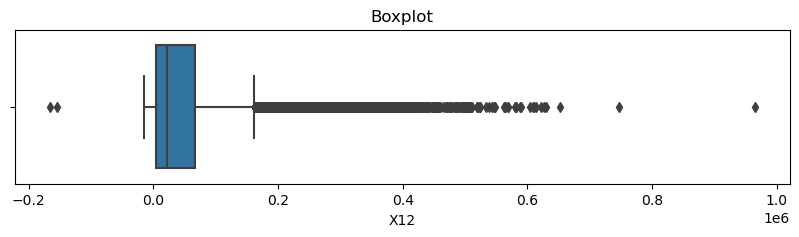

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


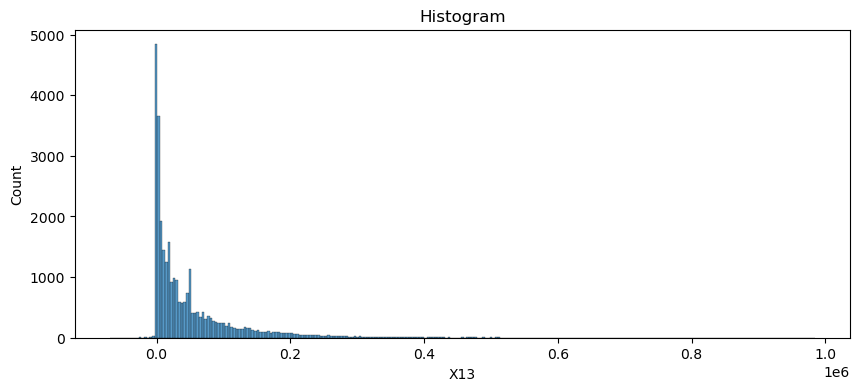

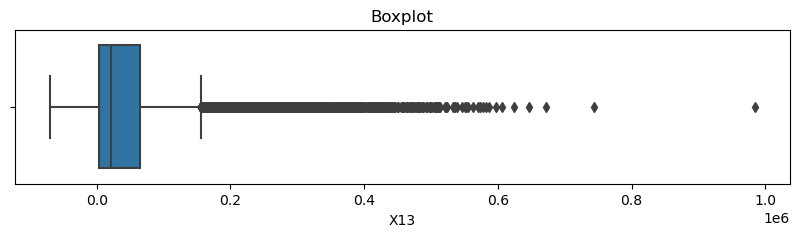

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


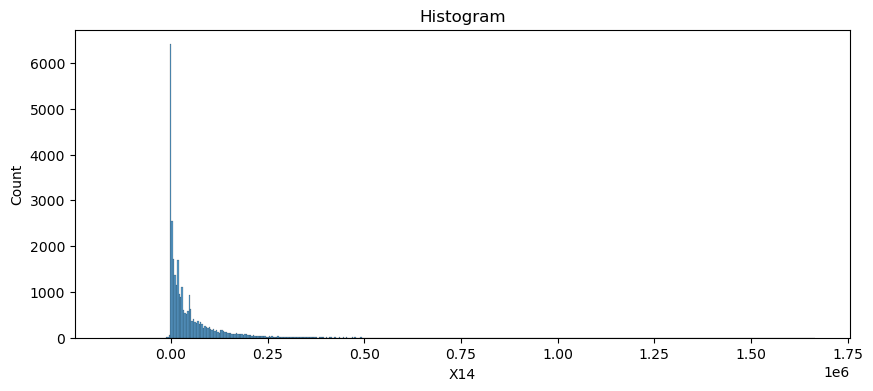

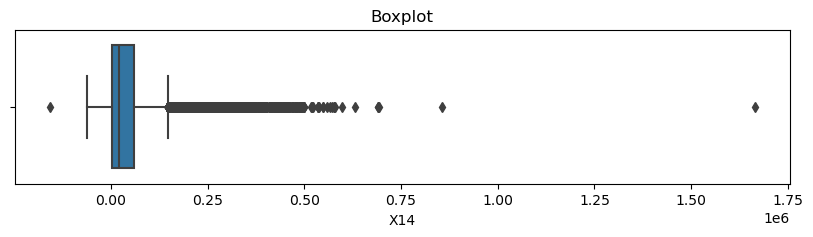

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


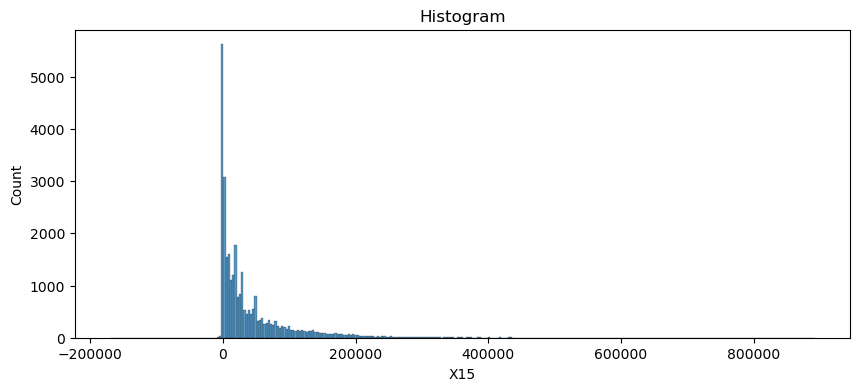

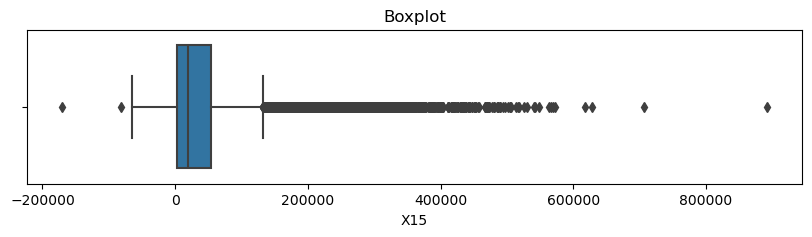

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


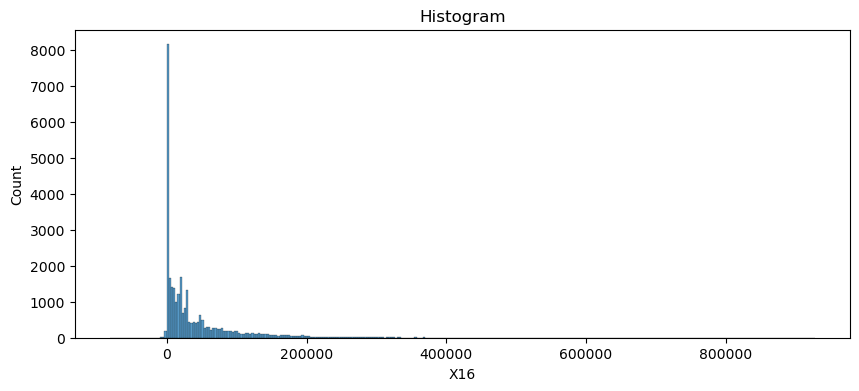

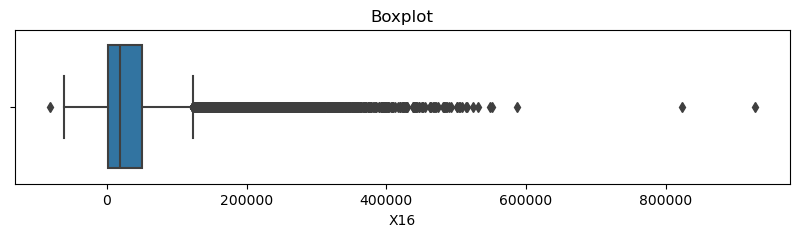

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


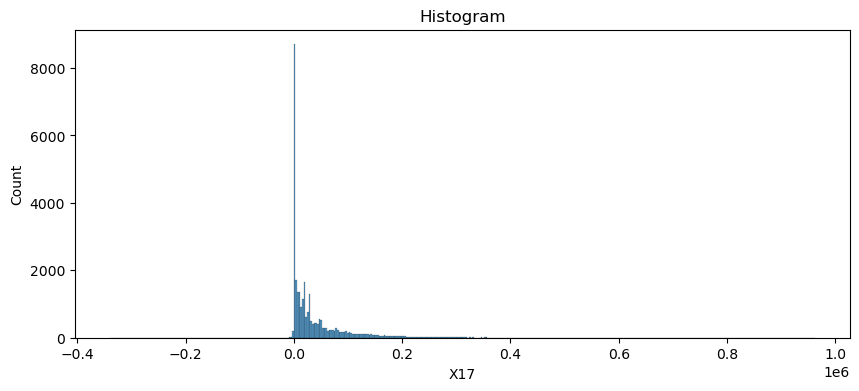

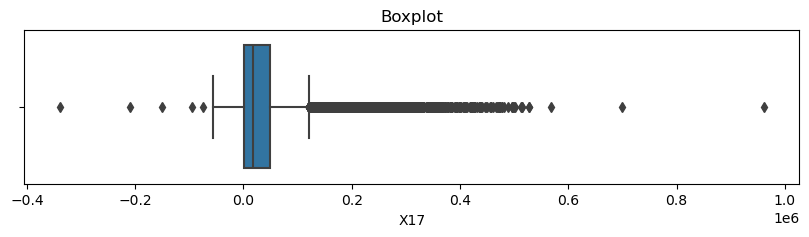

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


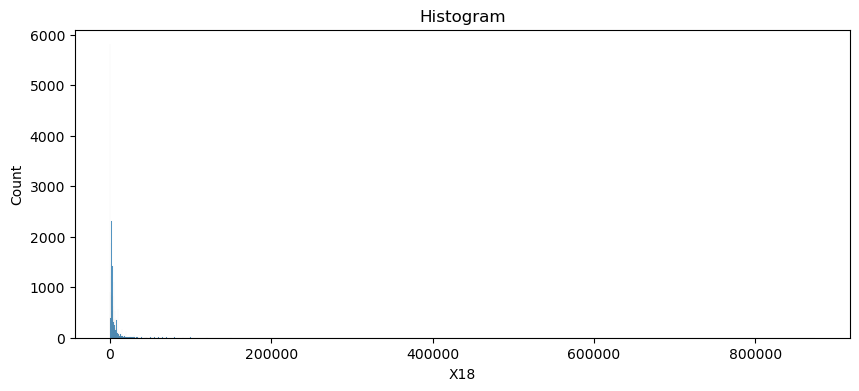

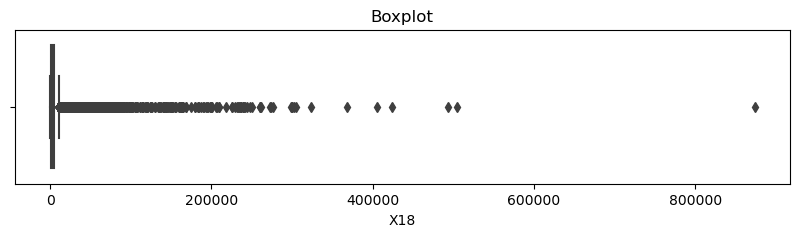

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


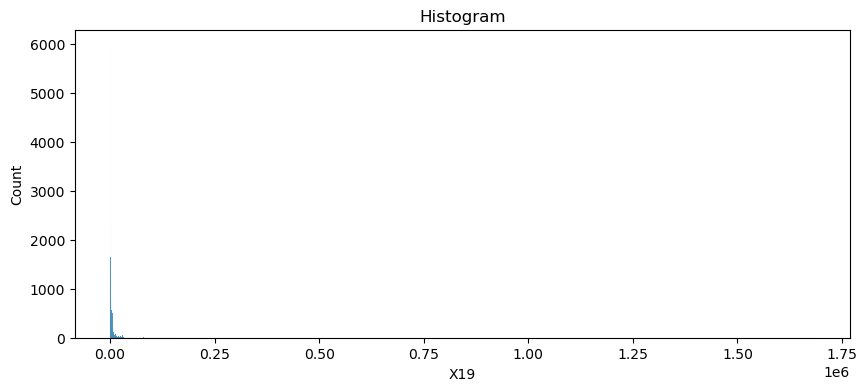

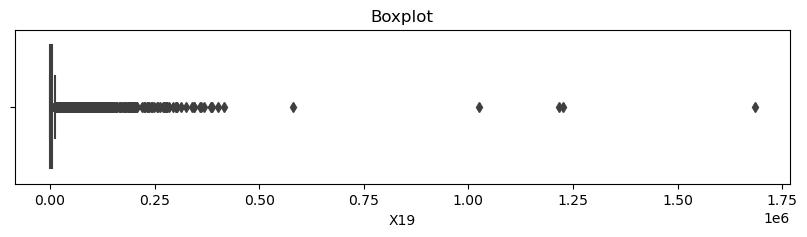

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


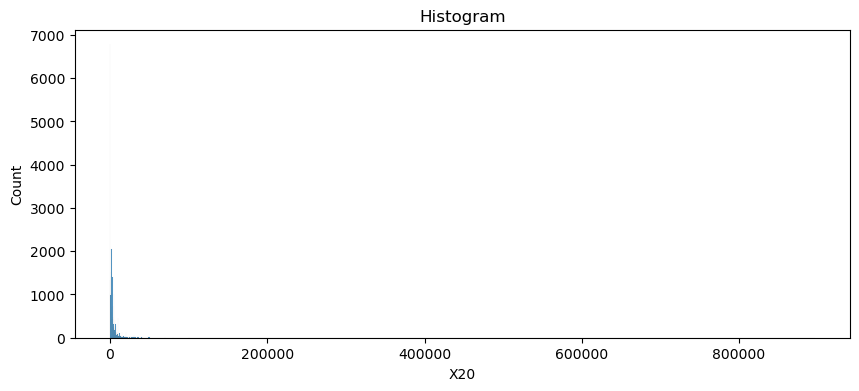

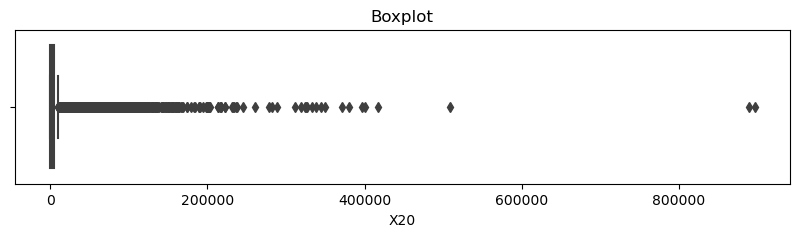

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


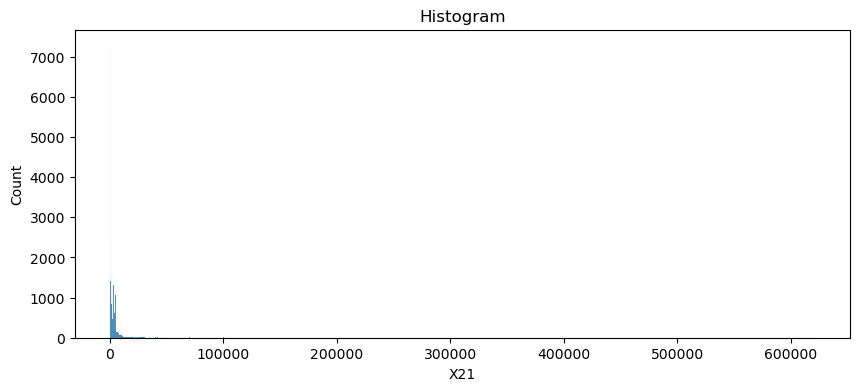

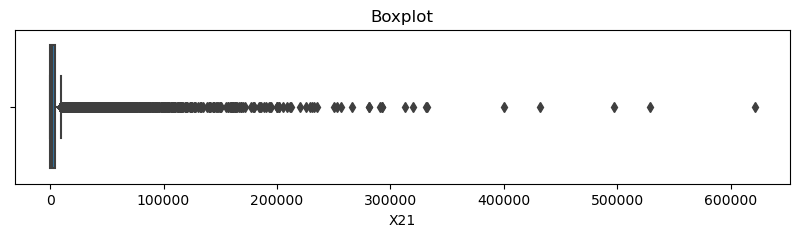

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


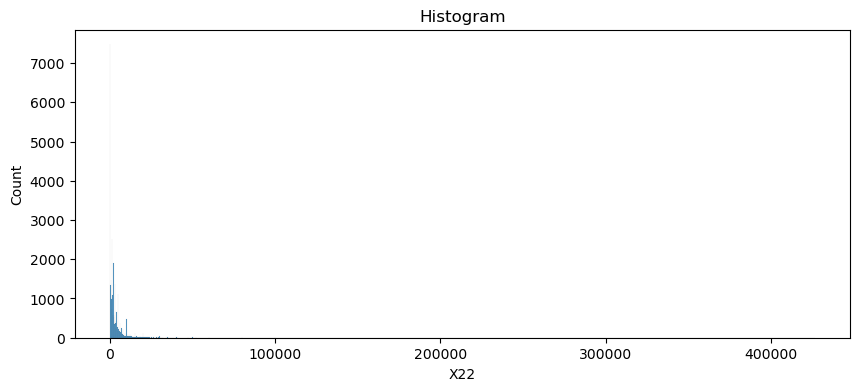

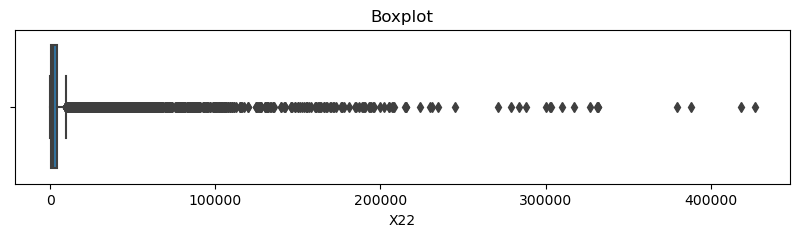

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


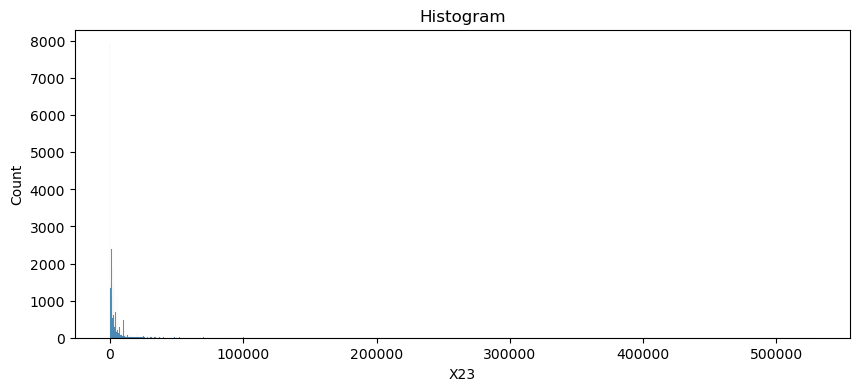

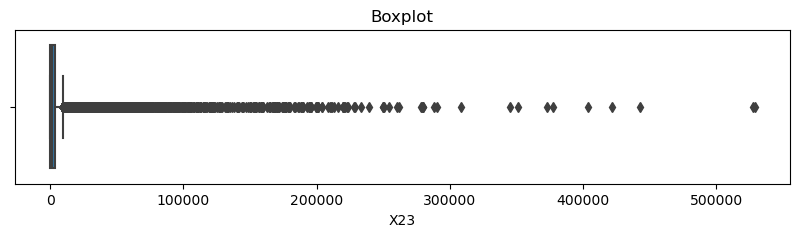

In [12]:
for col in continous_col:
    outlier_check(X[col])

In [24]:

    for col in continous_col:
        try:
            X[col] = X[col].apply(log1p)
        except Exception as e:
            print(f"Column '{col}' failed conversion: {e}")

Column 'X12' failed conversion: math domain error
Column 'X13' failed conversion: math domain error
Column 'X14' failed conversion: math domain error
Column 'X15' failed conversion: math domain error
Column 'X16' failed conversion: math domain error
Column 'X17' failed conversion: math domain error
Column 'X12' failed conversion: math domain error
Column 'X13' failed conversion: math domain error
Column 'X14' failed conversion: math domain error
Column 'X15' failed conversion: math domain error
Column 'X16' failed conversion: math domain error
Column 'X17' failed conversion: math domain error


C:\Users\Tim\AppData\Local\Temp\ipykernel_20356\851557791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(log1p)


In [19]:
non_numeric_cols = X[continous_col].select_dtypes(include='object').columns
print("Non-numeric columns:", list(non_numeric_cols))

Non-numeric columns: []


In [21]:
for col in continous_col:
    try:
        X[col].astype(float)
    except Exception as e:
        print(f"Column '{col}' failed conversion: {e}")

In [12]:
cols_to_check = X.columns[12:18] 

In [13]:
filtered_df = X[(X[cols_to_check] == 0).any(axis=1)]

In [66]:
filtered_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,9.903538,2,2,1,3.218876,2,2,-1,-1,-2,...,689,0,0,0,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000
1,11.695255,2,2,2,3.295837,-1,2,0,0,0,...,2682,3272,3455,3261,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402
9,9.903538,1,3,2,3.583519,-2,-2,-2,-2,-1,...,0,0,13007,13912,0.000000,0.000000,0.000000,9.473320,7.023759,0.000000
15,10.819798,2,3,3,3.178054,1,2,0,0,0,...,28116,28771,29531,30211,0.000000,7.313887,7.003974,7.090910,7.170888,7.003974
18,12.793862,2,1,1,3.912023,1,-2,-2,-2,-2,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29989,11.918397,1,1,2,3.583519,-1,-1,-1,-1,-1,...,-3,780,0,0,9.111072,0.000000,6.664409,0.000000,0.000000,0.000000
29991,12.254868,1,2,1,3.555348,3,2,2,2,2,...,2500,2500,2500,2500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29992,9.210440,1,3,1,3.784190,0,0,0,-2,-2,...,0,0,0,0,7.601402,0.000000,0.000000,0.000000,0.000000,0.000000
29996,11.918397,1,3,2,3.784190,-1,-1,-1,-1,0,...,3502,8979,5190,0,7.516433,8.168203,9.104869,4.867534,0.000000,0.000000


In [40]:
X.loc[18]

X1     12.793862
X2      2.000000
X3      1.000000
X4      1.000000
X5      3.912023
X6      1.000000
X7     -2.000000
X8     -2.000000
X9     -2.000000
X10    -2.000000
X11    -2.000000
X12     0.000000
X13     0.000000
X14     0.000000
X15     0.000000
X16     0.000000
X17     0.000000
X18     0.000000
X19     0.000000
X20     0.000000
X21     0.000000
X22     0.000000
X23     0.000000
Name: 18, dtype: float64

In [34]:
y.loc[29958	]

Y    0
Name: 29958, dtype: int64

In [67]:
for col in continous_col:
    print(f"{col}: {len(X[X[col] < 0])}")

X1: 0
X5: 0
X12: 0
X13: 0
X14: 0
X15: 0
X16: 0
X17: 0
X12: 0
X13: 0
X14: 0
X15: 0
X16: 0
X17: 0
X18: 0
X19: 0
X20: 0
X21: 0
X22: 0
X23: 0


In [43]:
len(X)

30000

In [44]:
600/30000

0.02

In [18]:
#clear zeros from dataframe to normalize

df_clean = df[df<0]=np.nan


In [19]:
df_clean = df.dropna()

In [20]:
df_clean

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2,90000,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000,2019,1200,1100,1069,1000,0
5,50000,1,1,2,37,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000,40000,38000,20239,13750,13770,0
8,140000,2,3,1,28,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329,0,432,1000,1000,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,140000,1,2,1,41,0.0,0.0,0.0,0.0,0.0,...,138262.0,49675.0,46121.0,6000,7000,4228,1505,2000,2000,0
29991,210000,1,2,1,34,3.0,2.0,2.0,2.0,2.0,...,2500.0,2500.0,2500.0,0,0,0,0,0,0,1
29994,80000,1,2,2,34,2.0,2.0,2.0,2.0,2.0,...,77519.0,82607.0,81158.0,7000,3500,0,7000,0,4000,1
29995,220000,1,3,1,39,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500,20000,5003,3047,5000,1000,0


In [15]:
#don't need to normalize age
normalize_columns    = ['X1', 'X12', 'X13', 'X14','X15','X16','X17','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

In [120]:
for col in continous_col:
    print(f"{col}: {len(df_clean[df_clean[col] < 0])}")

X1: 0
X5: 0
X12: 0
X13: 0
X14: 0
X15: 0
X16: 0
X17: 0
X12: 0
X13: 0
X14: 0
X15: 0
X16: 0
X17: 0
X18: 0
X19: 0
X20: 0
X21: 0
X22: 0
X23: 0


In [97]:
df_clean.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

In [21]:
for col in normalize_columns:
    try:
        df_clean[col] = df_clean[col].apply(log1p)
    except Exception as e:
        print(f"Column '{col}' failed conversion: {e}")
        

C:\Users\Tim\AppData\Local\Temp\ipykernel_23740\1784749057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].apply(log1p)


In [22]:
df_clean

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2,11.407576,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,2.358043,2.362023,2.365730,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,0
3,10.819798,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,2.420470,2.422470,2.424251,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,0
5,10.819798,1,1,2,37,0.0,0.0,0.0,0.0,0.0,...,2.386262,2.387322,2.389197,7.824446,7.504392,6.489205,6.908755,6.908755,6.685861,0
6,13.122365,1,1,2,29,0.0,0.0,0.0,0.0,0.0,...,2.653540,2.645308,2.643963,10.915107,10.596660,10.545368,9.915416,9.528867,9.530320,0
8,11.849405,2,3,1,28,0.0,0.0,2.0,0.0,0.0,...,2.342784,2.339432,2.221535,8.110728,0.000000,6.070738,6.908755,6.908755,6.908755,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,11.849405,1,2,1,41,0.0,0.0,0.0,0.0,0.0,...,2.552325,2.469224,2.462920,8.699681,8.853808,8.349721,7.317212,7.601402,7.601402,0
29991,12.254868,1,2,1,34,3.0,2.0,2.0,2.0,2.0,...,2.177526,2.177526,2.177526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
29994,11.289794,1,2,2,34,2.0,2.0,2.0,2.0,2.0,...,2.506203,2.511375,2.509938,8.853808,8.160804,0.000000,8.853808,0.000000,8.294300,1
29995,12.301387,1,3,1,39,0.0,0.0,0.0,0.0,0.0,...,2.516498,2.429164,2.368294,9.047939,9.903538,8.517993,8.022241,8.517393,6.908755,0


c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


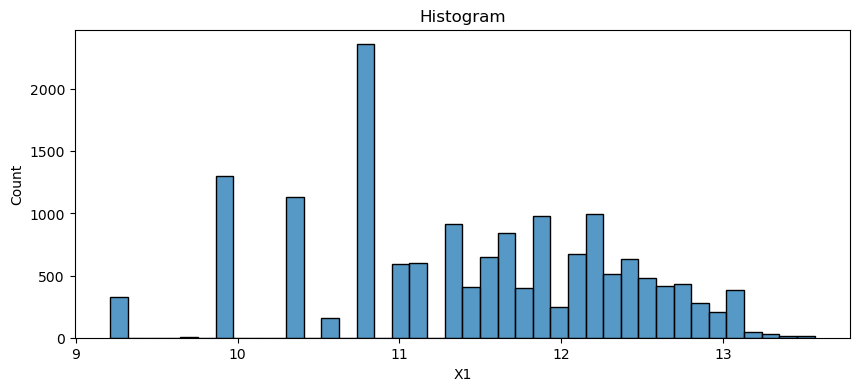

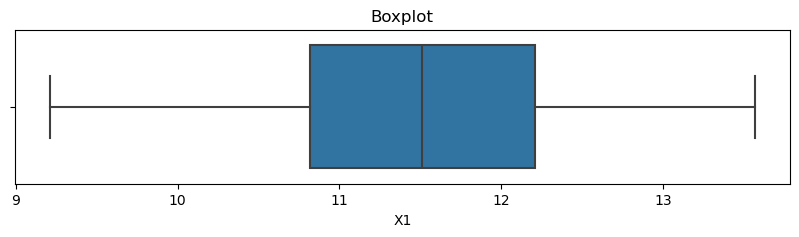

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


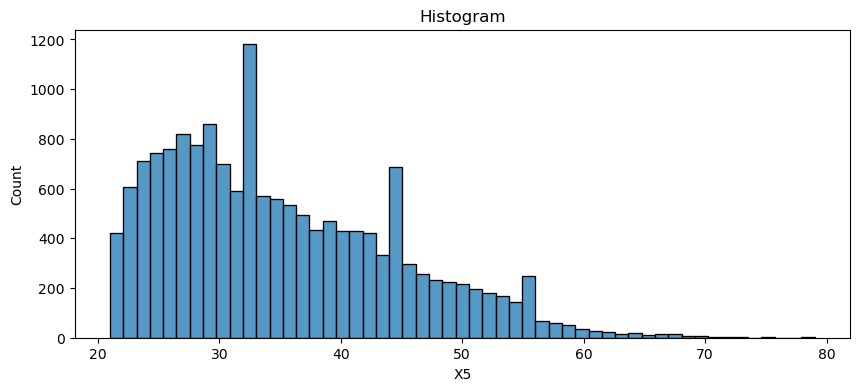

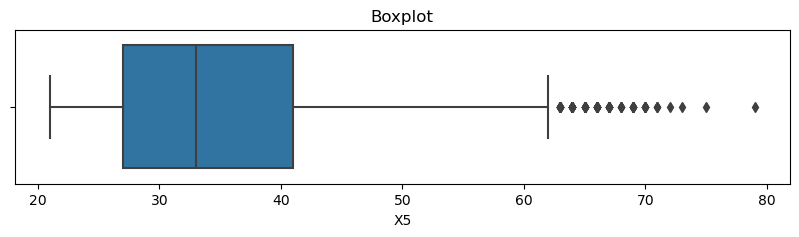

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


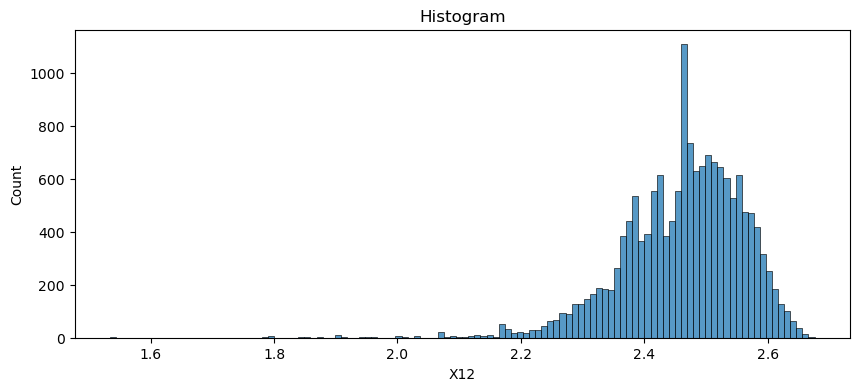

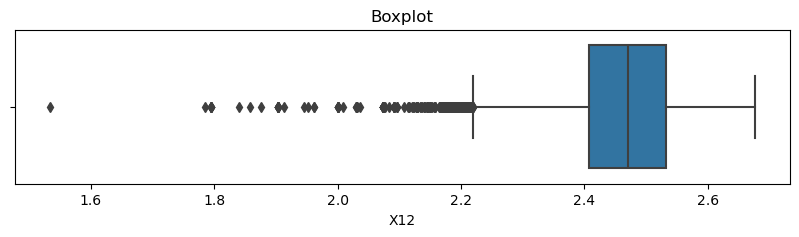

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


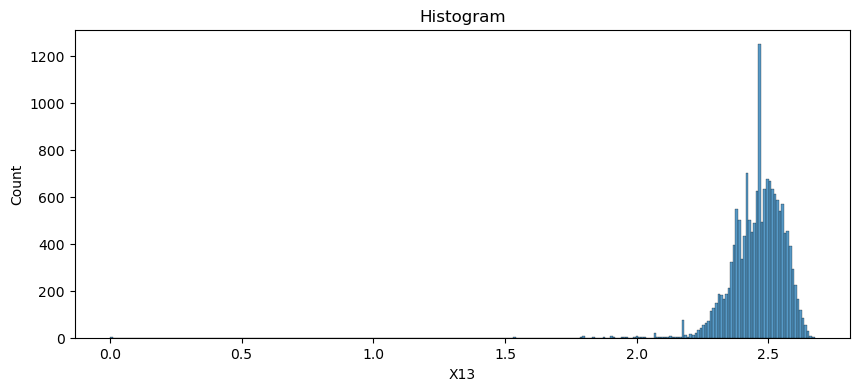

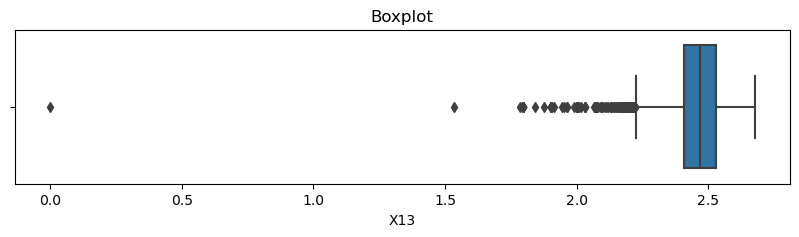

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


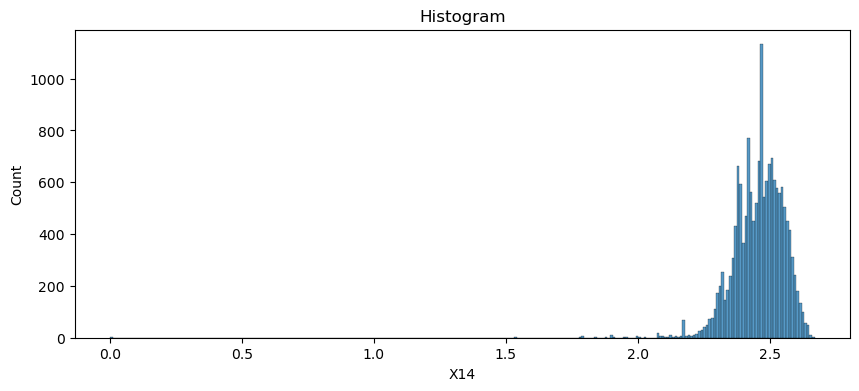

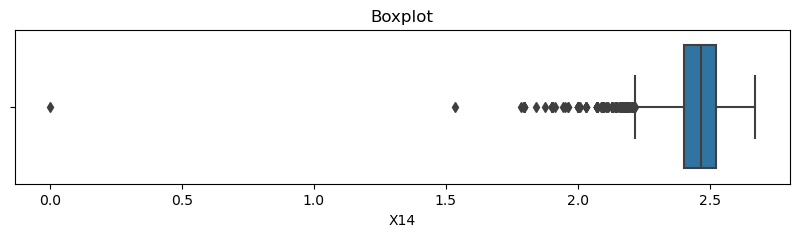

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


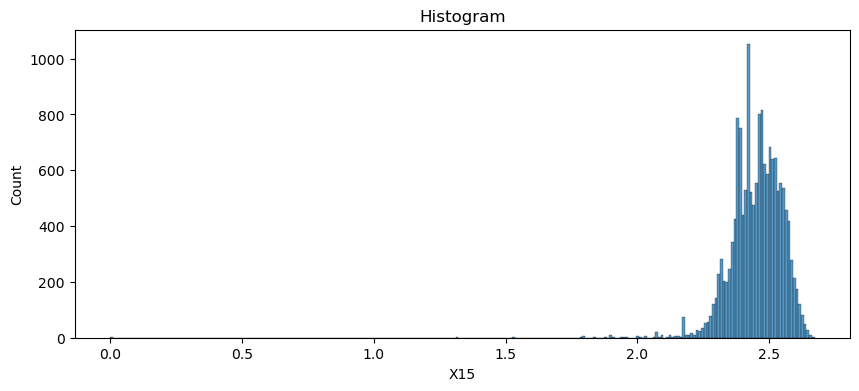

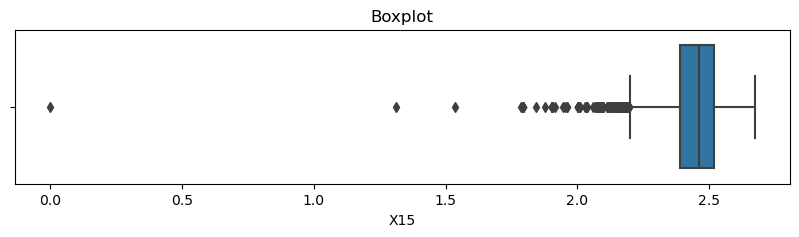

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


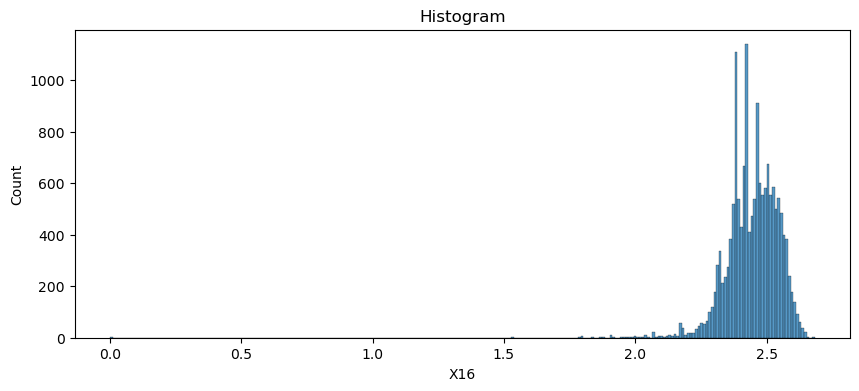

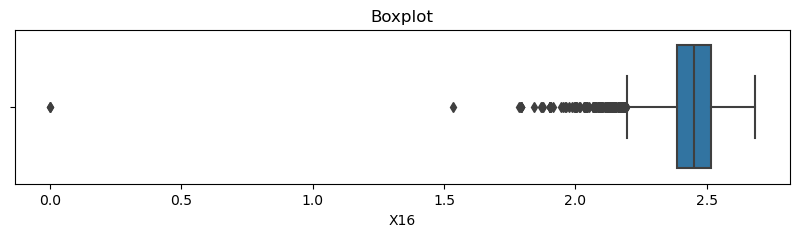

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


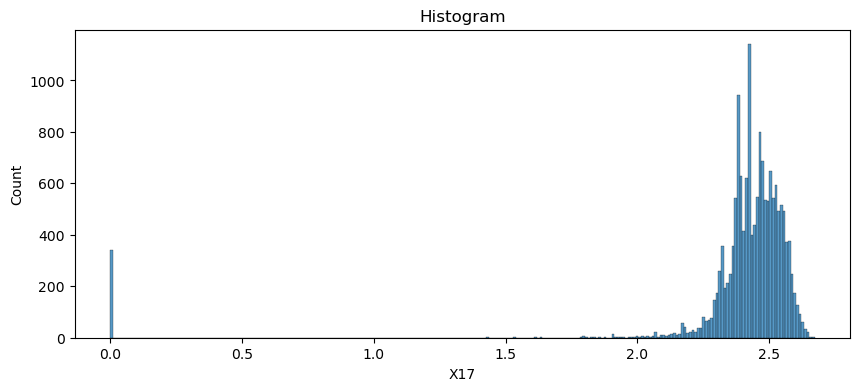

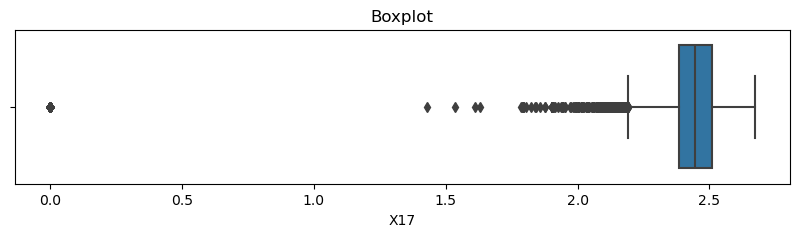

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


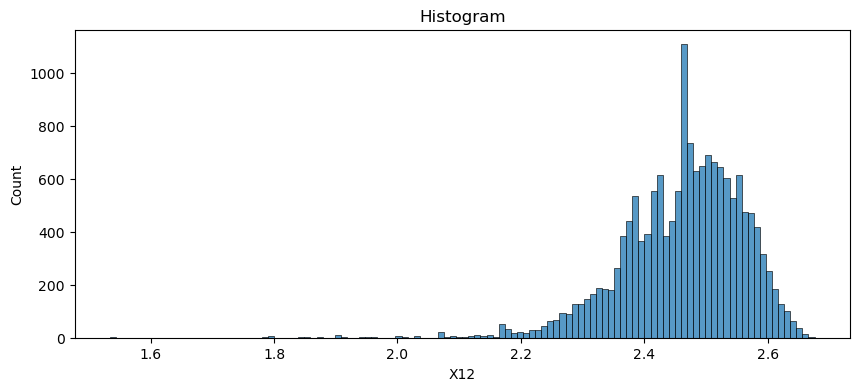

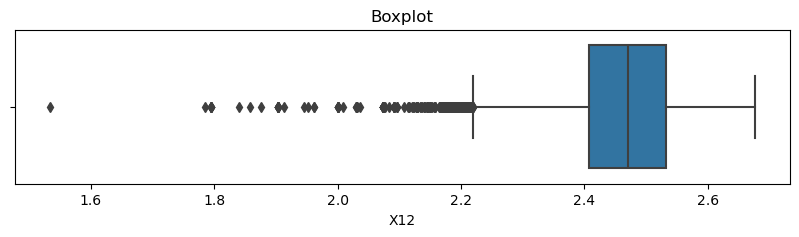

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


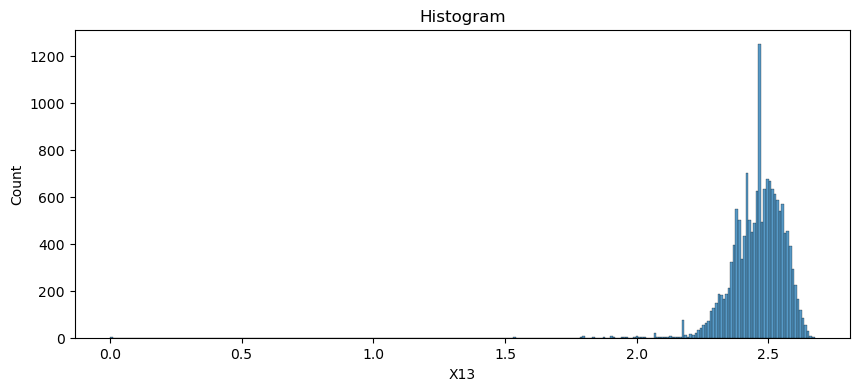

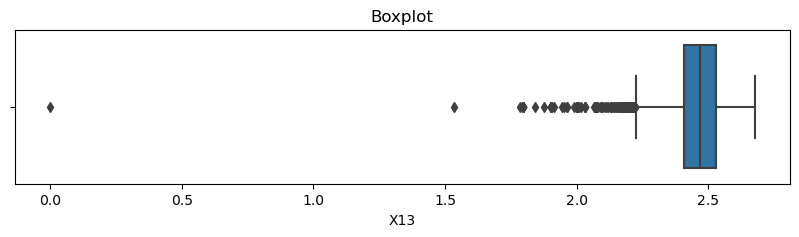

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


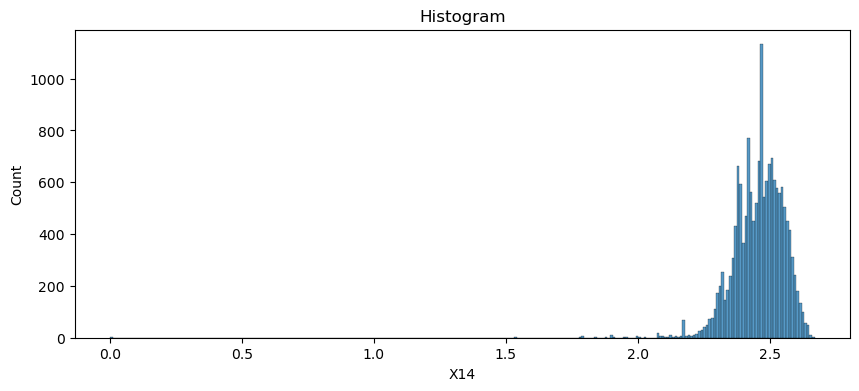

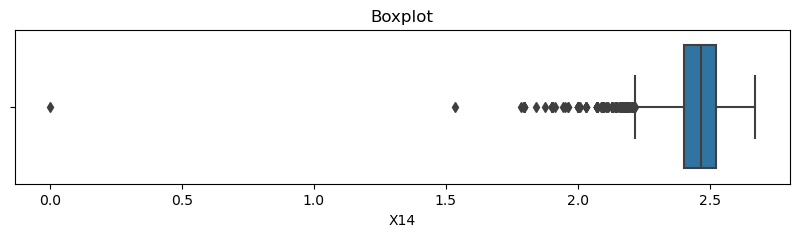

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


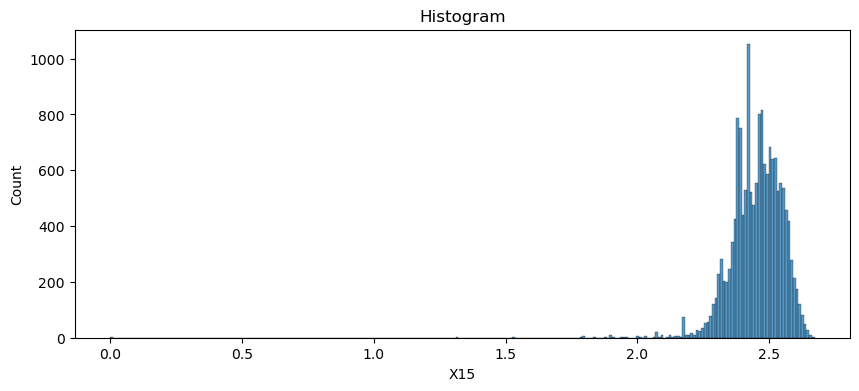

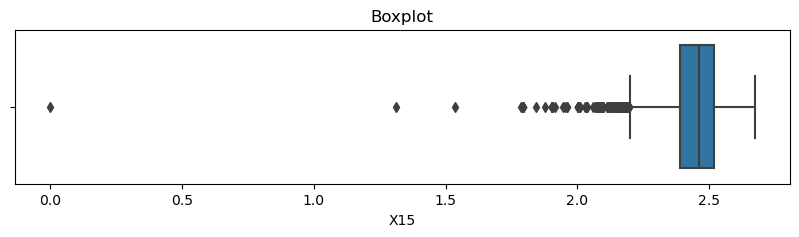

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


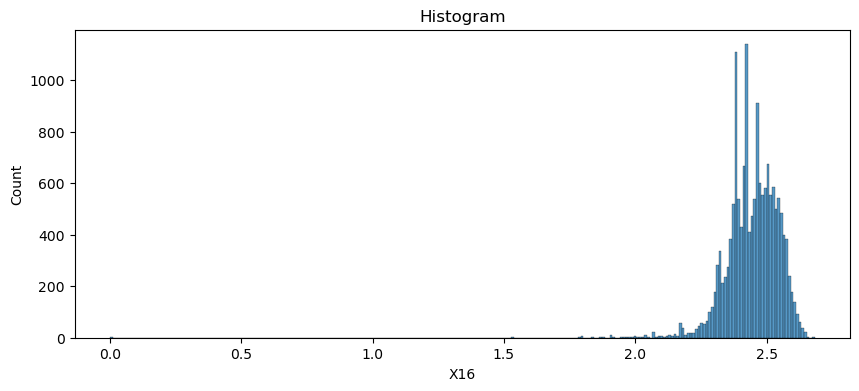

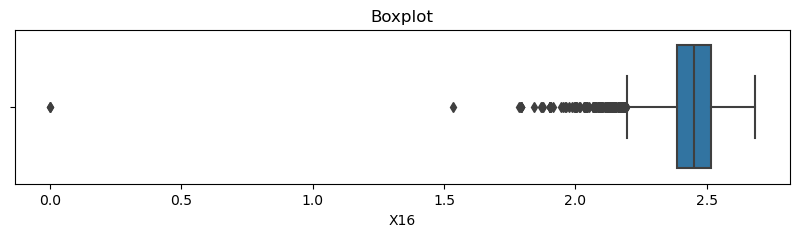

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


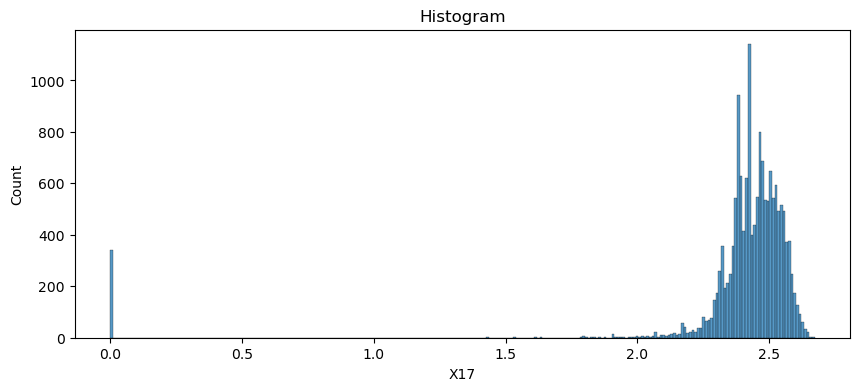

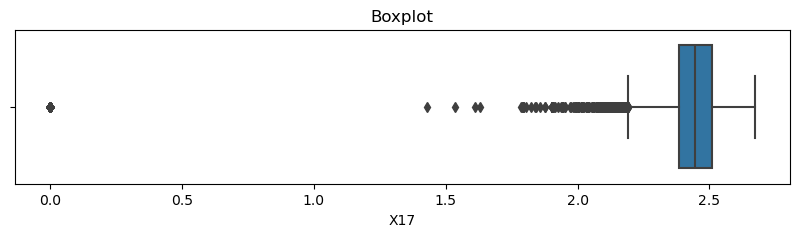

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


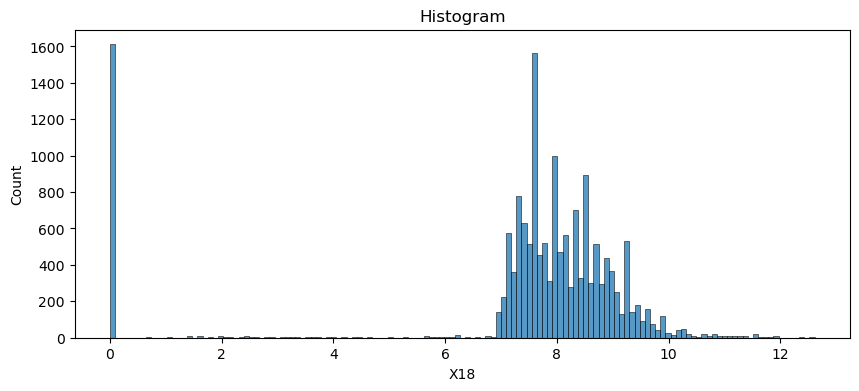

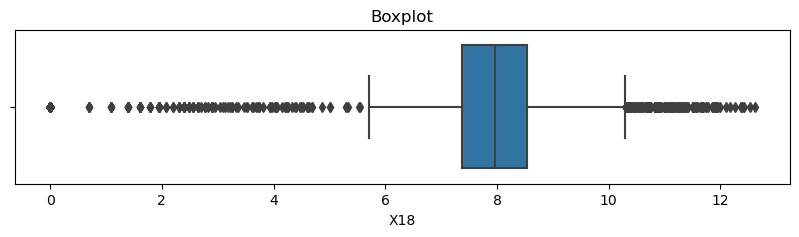

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


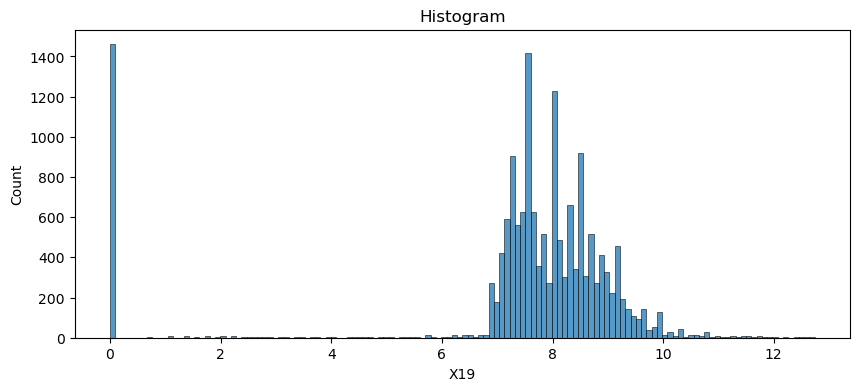

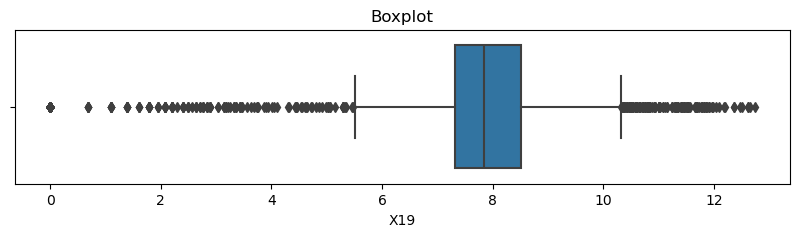

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


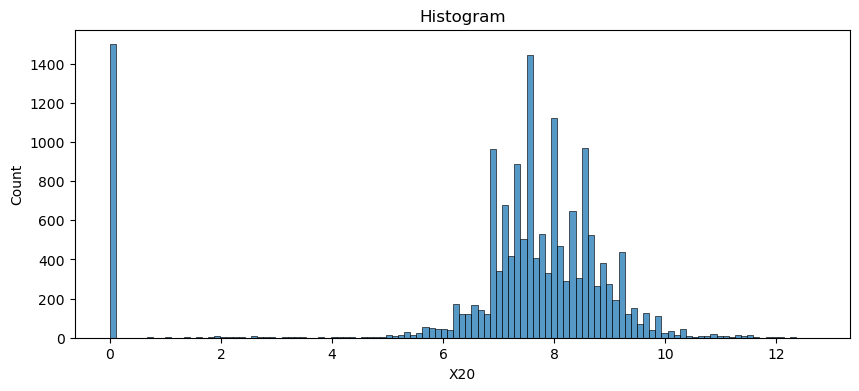

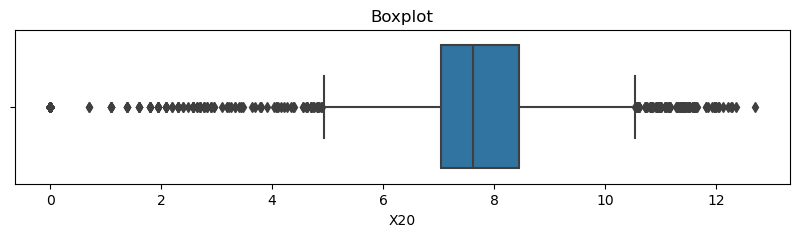

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


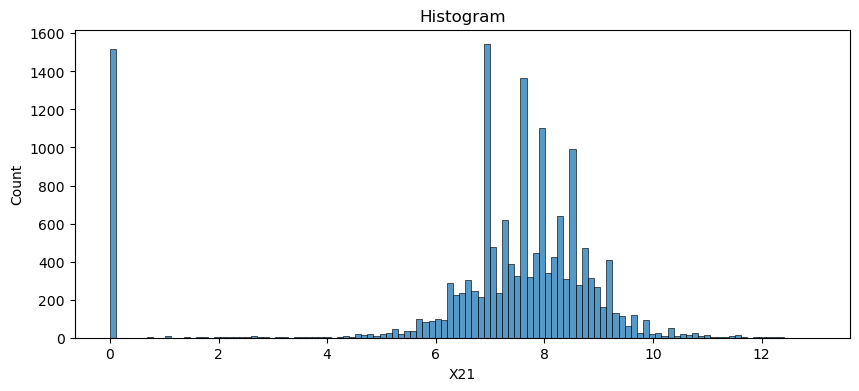

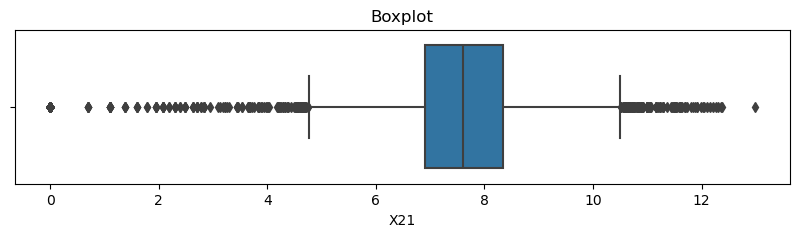

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


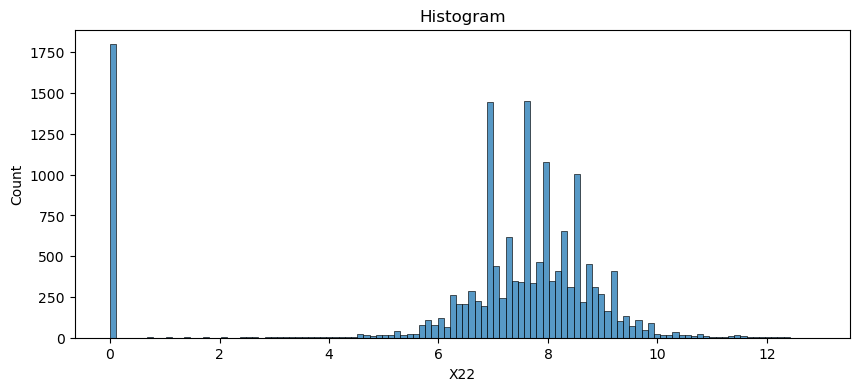

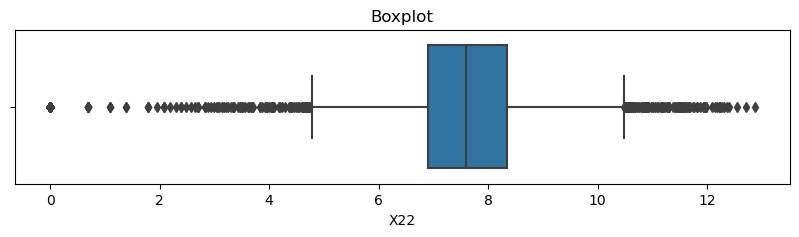

c:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


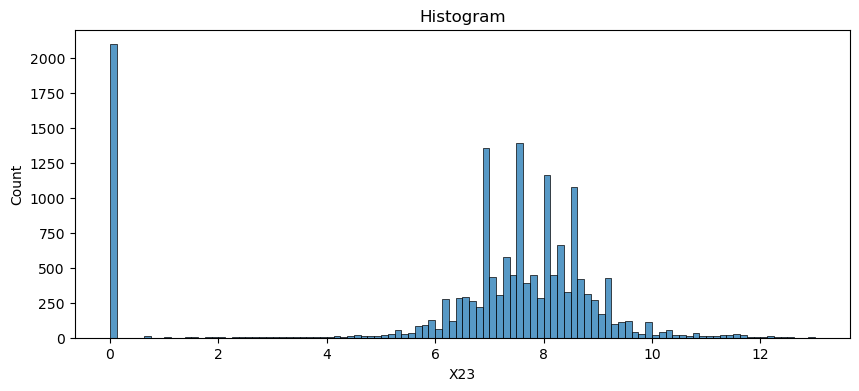

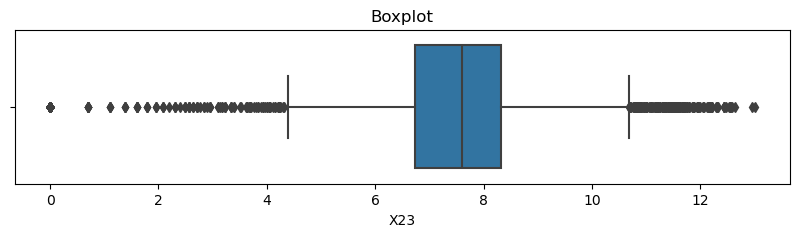

In [102]:
for col in continous_col:
    outlier_check(df_clean[col])

In [23]:
df_clean

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2,11.407576,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,2.358043,2.362023,2.365730,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,0
3,10.819798,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,2.420470,2.422470,2.424251,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,0
5,10.819798,1,1,2,37,0.0,0.0,0.0,0.0,0.0,...,2.386262,2.387322,2.389197,7.824446,7.504392,6.489205,6.908755,6.908755,6.685861,0
6,13.122365,1,1,2,29,0.0,0.0,0.0,0.0,0.0,...,2.653540,2.645308,2.643963,10.915107,10.596660,10.545368,9.915416,9.528867,9.530320,0
8,11.849405,2,3,1,28,0.0,0.0,2.0,0.0,0.0,...,2.342784,2.339432,2.221535,8.110728,0.000000,6.070738,6.908755,6.908755,6.908755,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,11.849405,1,2,1,41,0.0,0.0,0.0,0.0,0.0,...,2.552325,2.469224,2.462920,8.699681,8.853808,8.349721,7.317212,7.601402,7.601402,0
29991,12.254868,1,2,1,34,3.0,2.0,2.0,2.0,2.0,...,2.177526,2.177526,2.177526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
29994,11.289794,1,2,2,34,2.0,2.0,2.0,2.0,2.0,...,2.506203,2.511375,2.509938,8.853808,8.160804,0.000000,8.853808,0.000000,8.294300,1
29995,12.301387,1,3,1,39,0.0,0.0,0.0,0.0,0.0,...,2.516498,2.429164,2.368294,9.047939,9.903538,8.517993,8.022241,8.517393,6.908755,0


In [105]:
#will split into 3 groups for Logistic regression


In [24]:
model = linear_model.LogisticRegression()

In [25]:
#group 1 demographics

X_demo = df_clean.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'Y']]

In [26]:
X_demo.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'Y'], dtype='object')

In [27]:
#define target variable
X = X_demo.drop('Y', axis= 1)
y = X_demo['Y']

In [28]:
#Create training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [29]:
 # Train the Logistic Regression model

model.fit(X_train, y_train)


LogisticRegression()

In [30]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.81%


In [31]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2356   11]
 [ 830   14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      2367
           1       0.56      0.02      0.03       844

    accuracy                           0.74      3211
   macro avg       0.65      0.51      0.44      3211
weighted avg       0.69      0.74      0.63      3211



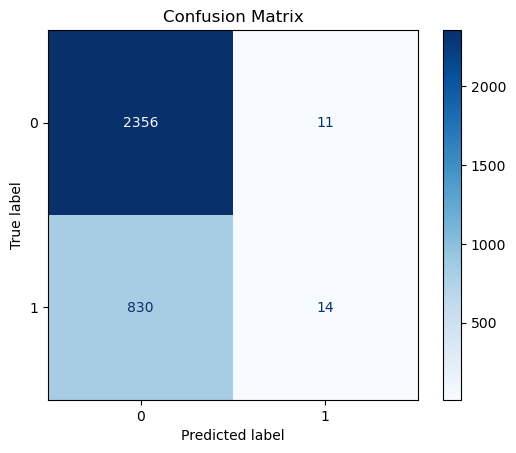

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

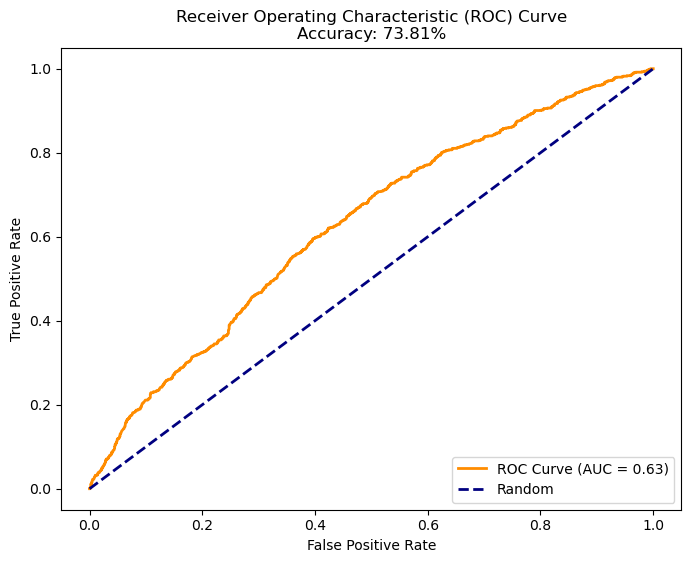

In [ ]:
  # Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

In [45]:
#group 2 billing

X_bill = df_clean[['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']]

In [46]:
#define target variable
X = X_bill.drop('Y', axis= 1)
y = X_bill['Y']

In [47]:
#Create training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [48]:
 # Train the Logistic Regression model

model.fit(X_train, y_train)


LogisticRegression()

In [49]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.00%


In [50]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2163  204]
 [ 406  438]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      2367
           1       0.68      0.52      0.59       844

    accuracy                           0.81      3211
   macro avg       0.76      0.72      0.73      3211
weighted avg       0.80      0.81      0.80      3211



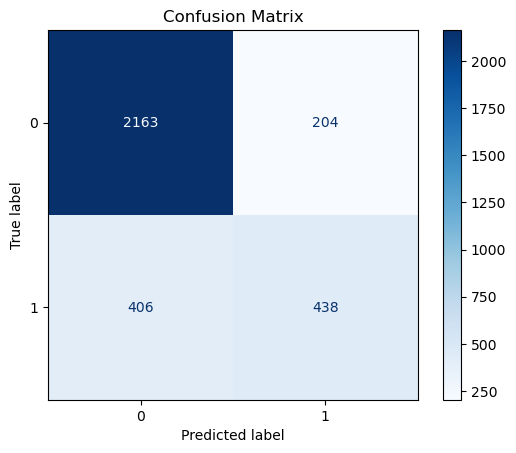

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

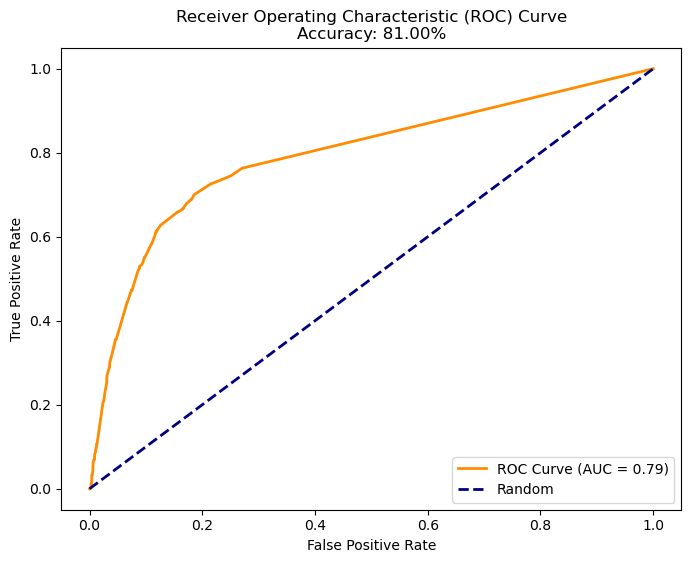

In [157]:
  # Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

In [52]:
#group 3 payment

X_pay = df_clean[['X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']]


In [53]:
#define target variable
X = X_pay.drop('Y', axis= 1)
y = X_pay['Y']

In [54]:
#Create training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [55]:
 # Train the Logistic Regression model

model.fit(X_train, y_train)


LogisticRegression()

In [56]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 75.62%


In [57]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2272   95]
 [ 688  156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85      2367
           1       0.62      0.18      0.28       844

    accuracy                           0.76      3211
   macro avg       0.69      0.57      0.57      3211
weighted avg       0.73      0.76      0.70      3211



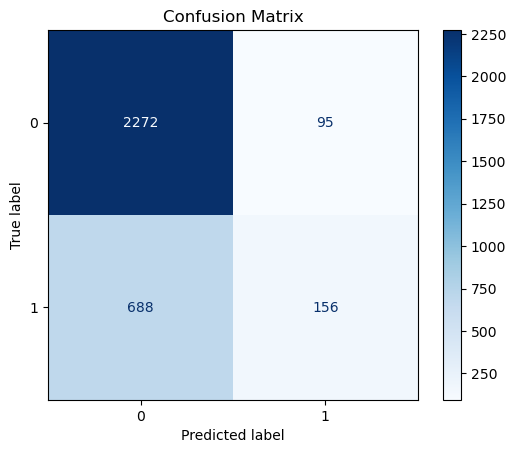

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

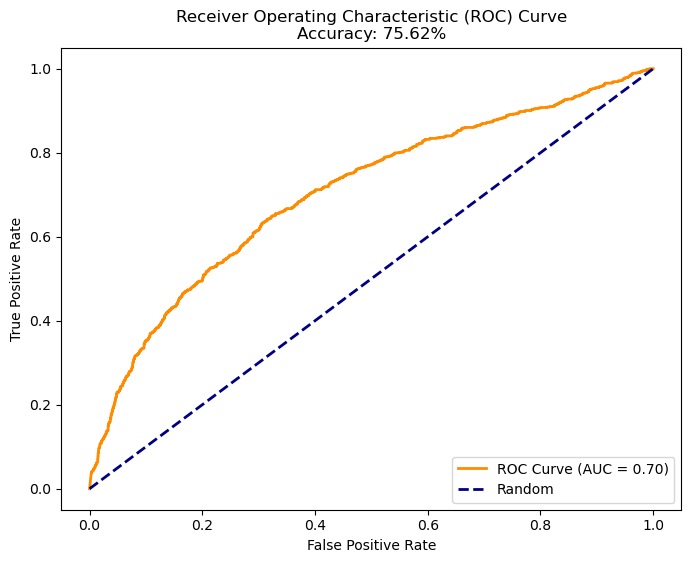

In [167]:
  # Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()